checking the current working directory address ...
/kaggle/working
listing all files in the current working directory ...
['__notebook__.ipynb']
moving on to the practice code ...

> TDM info summary ...

<<TermDocumentMatrix (terms: 5, documents: 7162)>>
Non-/sparse entries: 55017/-19207
Sparsity           : -54%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
               Docs.
Terms     1 _ one.txt  2 _ two.txt 3 _ three.txt 4 _ four.txt 5 _ five.txt

... (skipping this matrix due to it being too big) ...


> plotting TDM dendrogram ...

TDM dendrogram graph saved as 'py-tdm_dendrogram.png'


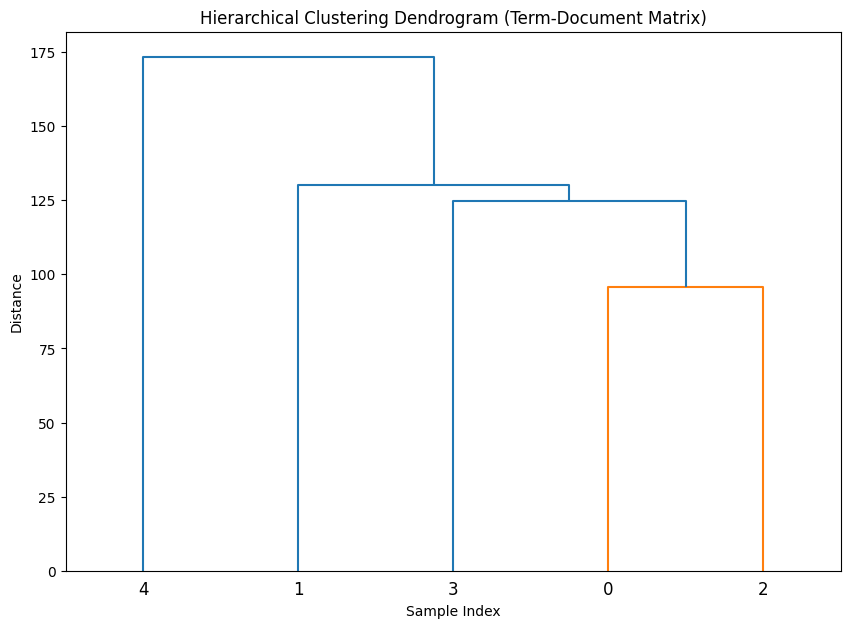


Frequent terms (appearing 35 or more times):
'10'100694'11'121'15'17'2011'2012'2013'2014'2015'2016'2017'2018'2022'2023'access'accid'activ'addit'aerial'aerodynam'aerospac'agricultur'air'aircraft'airship'airspac'al'algorithm'also'among'analysi'anoth'appli'applic'approach'architectur'area'around'attack'authent'author'autonom'avail'avoid'balloon'base'benefit'blockchain'call'camera'capabl'capac'case'categori'caus'challeng'chang'china'civilian'coaxial'collect'collis'combin'commerci'common'communic'compani'compar'complex'comput'concept'concern'confer'configur'consid'control'cost'creat'critic'cruis'current'darvishpoor'data'deliveri'deploy'design'detect'develop'devic'differ'direct'discuss'drone'dual'duct'due'dynam'effect'effici'emerg'encrypt'endur'energi'engin'environ'et'even'exampl'exist'explor'fan'fig'first'flap'fli'flight'follow'forc'framework'futur'gcs'general'generat'global'govern'gps'ground'group'hardwar'hassanalian'helicopt'help'high'hover'howev'http'https'hybrid'id'ieee'imag'implement'

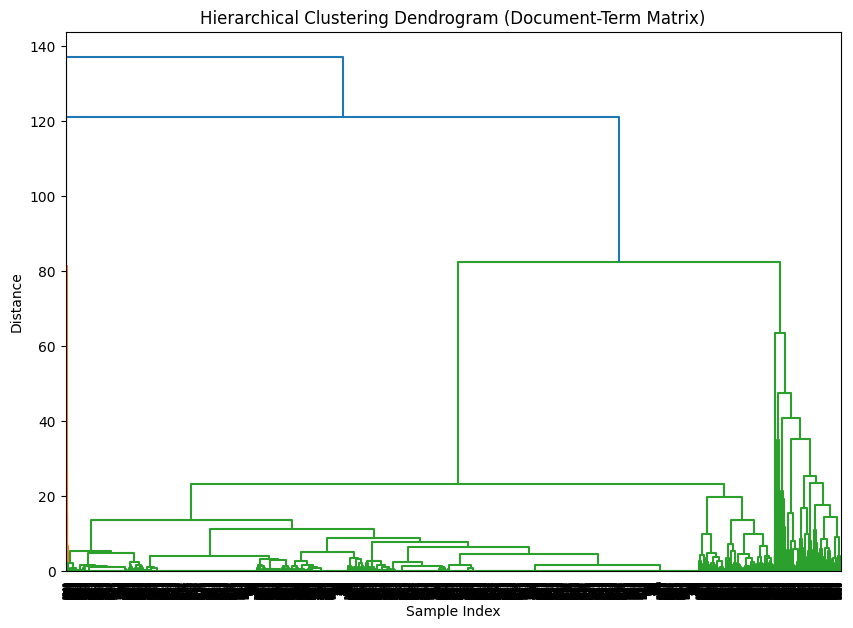

In [1]:
# an approximate "python_03" translation of the "r_studio" script made previously for research paper text analysis ;
# this research paper text analysis work was originally done as a part of a project for an abstract, titled "UNREGULATED DRONES AND THEIR IMPACT", submitted to a research conference, named "STUDENTS ON THEIR WAY TO SCIENCE", in april of 2024 CE ;
# the final version of the abstract can be found online in the conference proceedings publicaly available on the official website (direct link = "https://www.sws.lbtu.lv/sites/sws/files/pages/attachments/SWS%20PROCEEDINGS_2024_FINAL.pdf") ;
# this practice code for "python_03" was originally prepared by "swarn s. w. (a. y.)" with the "cc-by-nc-sa" license ;
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# the required NLTK data sets ('stopwords' & 'punkt') are already available in kaggle at a certain location ;
nltk.data.path.append("/usr/share/nltk_data")

# checking the current working directory address ;
print("checking the current working directory address ...")
print(os.getcwd())

# listing all files in the current working directory ;
print("listing all files in the current working directory ...")
print(os.listdir())

# moving on to the practice code ;
print("moving on to the practice code ...")

# defining a function to obtain the text corpus ;
def read_corpus(directory):
    """Read all text files from a directory"""
    texts = []
    filenames = []
    for filename in sorted(os.listdir(directory)):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                filenames.append(filename)
    return texts, filenames

# reading the text corpus from the kaggle input directory ;
corpus, filenames = read_corpus('/kaggle/input/my-corpus/my_corpus')

# initializing stemmer ;
stemmer = SnowballStemmer('english')

# defining custom stop words ;
custom_stops = ["View", "PDFView", "articleView", "ScopusGoogle", "Scholar",
               "the", "The", "articlea0", "2019", "2020", "2021", "can", 
               "use", "question"]

# defining preprocessing function ;
def preprocess_text(text):
    # tokenizing text ;
    tokens = word_tokenize(text)
    
    # removing punctuation & converting to lower case ;
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # removing standard & custom stop words ;
    stop_words = set(stopwords.words('english') + custom_stops)
    tokens = [word for word in tokens if word not in stop_words]
    
    # stemming words ;
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# preprocessing all documents ;
processed_corpus = [preprocess_text(doc) for doc in corpus]

# creating a term-document matrix ;
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(processed_corpus)

# defining a function to display matrix info similar to r_studio's output ;
def display_matrix_info(matrix, terms, docs, matrix_type="TermDocumentMatrix"):
    n_terms, n_docs = matrix.shape
    non_zero = matrix.sum()
    sparsity = (1.0 - (non_zero / (n_terms * n_docs))) * 100
    max_term_length = max(len(term) for term in terms)
    
    print(f"<<{matrix_type} (terms: {n_terms}, documents: {n_docs})>>")
    print(f"Non-/sparse entries: {int(non_zero)}/{(n_terms * n_docs) - int(non_zero)}")
    print(f"Sparsity           : {sparsity:.0f}%")
    print(f"Maximal term length: {max_term_length}")
    print(f"Weighting          : term frequency (tf)")
    print("Sample             :")
    
    # displaying sample terms & their frequencies ;
    print("               Docs.")
    print("Terms    " + " ".join(f"{doc:>12}" for doc in filenames))
    
    # selecting some interesting terms to show (the ones with highest total frequency) ;
    if matrix_type == "TermDocumentMatrix":
        # selecting terms that appear in multiple documents and have significant frequencies ;
        term_sums = matrix.sum(axis=1).A1
        # counting docs where term appears ;
        term_docs = (matrix > 0).sum(axis=1).A1  
        # filtering terms that appear in at least two documents and have meaningful total frequency ;
        meaningful_terms = [(i, s) for i, (s, d) in enumerate(zip(term_sums, term_docs)) 
                           # adjusting these thresholds as needed ;
                           if d >= 2 and s >= 10]  
        # sorting by total frequency and take top ten ;
        top_terms_idx = sorted(meaningful_terms, key=lambda x: x[1], reverse=True)[:10]
        top_terms_idx = [idx for idx, _ in top_terms_idx]
    else:
        # keeping the original logic for the DTM info summary ;
        term_sums = matrix.sum(axis=1).A1
        top_terms_idx = np.argsort(term_sums)[-10:]
    
    # displaying the selected terms ;
    if matrix_type == "TermDocumentMatrix":
        print("\n... (skipping this matrix due to it being too big) ...\n")
    else:
        for idx in top_terms_idx:
            term = terms[idx]
            freqs = matrix[idx].toarray()[0]
            print(f"{term:<9} " + " ".join(f"{freq:>12}" for freq in freqs))

# converting to a data frame & displaying the TDM info summary ;
terms = vectorizer.get_feature_names_out()
df = pd.DataFrame(tdm.toarray(), columns=terms)
print("\n> TDM info summary ...\n")
display_matrix_info(tdm, terms, filenames)

# scaling the data set ;
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# calculating distance matrix & perform hierarchical clustering ;
d = linkage(df_scaled, method='ward')

# plotting a dendrogram for the TDM ;
print("\n> plotting TDM dendrogram ...\n")
plt.figure(figsize=(10, 7))
dendrogram(d)
plt.title('Hierarchical Clustering Dendrogram (Term-Document Matrix)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# saving the dendrogram plot in a file for the TDM ;
plt.savefig('py-tdm_dendrogram.png')  
print("TDM dendrogram graph saved as 'py-tdm_dendrogram.png'")

plt.show()

# finding frequent terms & displaying them ;
def find_frequent_terms(df, min_freq):
    term_freq = df.sum()
    frequent_terms = term_freq[term_freq >= min_freq].index.tolist()
    # sorting alphabetically like r_studio's output
    return sorted(frequent_terms)  

print("\nFrequent terms (appearing 35 or more times):")
freq_terms = find_frequent_terms(df, 35)
print("'" + "'".join(freq_terms) + "'")

# creating the document-term matrix info summary & displaying it ;
dtm = csr_matrix(tdm.T)
print("\n> DTM info summary ...\n")
display_matrix_info(dtm, terms, filenames, "DocumentTermMatrix")

# scaling the DTM ;
dtm_scaled = scaler.fit_transform(dtm.toarray())

# calculating distance matrix & perform hierarchical clustering for the DTM ;
d1 = linkage(dtm_scaled, method='ward')

# plotting a dendrogram for the DTM ;
print("\n> plotting DTM dendrogram ...\n")
plt.figure(figsize=(10, 7))
dendrogram(d1)
plt.title('Hierarchical Clustering Dendrogram (Document-Term Matrix)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# saving the dendrogram plot in a file for the DTM ;
plt.savefig('py-dtm_dendrogram.png')  
print("DTM dendrogram graph saved as 'py-dtm_dendrogram.png'")

plt.show()

# the end ;